# **Bussiness Problem**

**An online retail company wants to better understand its customer base to improve targeted marketing, customer retention, and sales performance. The business struggles with:**

- Sending the same promotions to all customers, regardless of their behavior.

- Difficulty in identifying loyal customers vs one-time buyers.

- Wasting marketing budget on low-value or inactive customers.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings. simplefilter("ignore")

In [3]:
df = pd.read_excel('Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
rows, cols = df.shape
print("number of rows:",rows)
print("number of columns:",cols)

number of rows: 541909
number of columns: 8


In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

# Step 1: Data Preprocessing

In [8]:
# Step 1: Data Preprocessing
# Drop rows with missing CustomerID
df = df.dropna(subset=['CustomerID'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [9]:
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [10]:
# Create a TotalPrice feature
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [11]:
# Aggregate data by CustomerID to get customer-level features
customer_df = df.groupby('CustomerID').agg({
                                             'Quantity': 'sum',        # Total quantity purchased
                                             'TotalPrice': 'sum',      # Total spending
                                             'InvoiceNo': 'nunique',   # Number of transactions
                                          }).rename(columns={'InvoiceNo': 'NumTransactions'}).reset_index()

In [12]:
customer_df

,CustomerID,Quantity,TotalPrice,NumTransactions
0,12346.0,0,0.00,2
1,12347.0,2458,4310.00,7
2,12348.0,2341,1797.24,4
3,12349.0,631,1757.55,1
4,12350.0,197,334.40,1
...,...,...,...,...
4367,18280.0,45,180.60,1
4368,18281.0,54,80.82,1
4369,18282.0,98,176.60,3
4370,18283.0,1397,2094.88,16


# Step 2: Feature Selection and Scaling

In [14]:
from sklearn.preprocessing import StandardScaler

features = ['Quantity', 'TotalPrice', 'NumTransactions']
X = customer_df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
X

,Quantity,TotalPrice,NumTransactions
0,0,0.00,2
1,2458,4310.00,7
2,2341,1797.24,4
3,631,1757.55,1
4,197,334.40,1
...,...,...,...
4367,45,180.60,1
4368,54,80.82,1
4369,98,176.60,3
4370,1397,2094.88,16


In [16]:
X_scaled

array([[-0.24021456, -0.23100099, -0.32936215],
       [ 0.28586959,  0.29343167,  0.20610242],
       [ 0.26082816, -0.01231622, -0.11517632],
       ...,
       [-0.21923969, -0.20951263, -0.22226923],
       [ 0.05878444,  0.02390005,  1.16993863],
       [ 0.09923599, -0.00744423, -0.22226923]])

In [17]:
customer_df.to_csv("Cleaned_data.csv")

# **1. K-Means CLustering**

- find the optimal number of clusters : Elbow Curve

In [19]:
wcss = []

for k in range(1,11):
    from sklearn. cluster import KMeans
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)            # inertia means WCSS

print(wcss)

[13115.999999999985, 6750.882870709955, 4986.1324992549635, 3614.2569413755605, 2831.8878785796496, 2260.708322620488, 1754.0969502325297, 1434.1188285669755, 1424.3225861173491, 1214.663749223692]


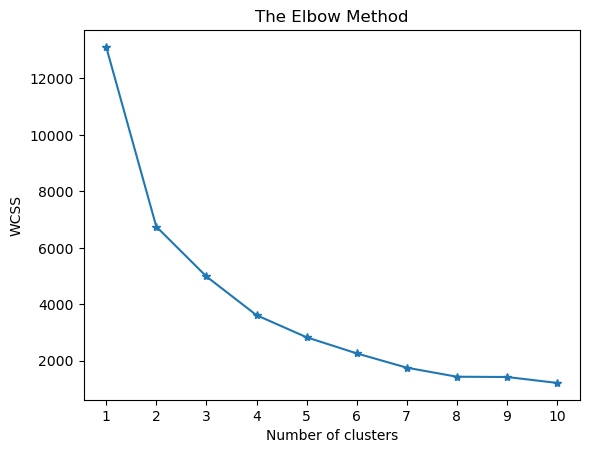

In [20]:
# Using the elbow method
plt.plot(range(1, 11), wcss, marker="*")
plt.xticks(range(1, 11))
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS' )
plt.show()

**K-Means CLustering Model**

In [22]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = True)    # init means starting centroids

customer_df["km_cluster"]= kmeans.fit_predict(X_scaled)

In [23]:
customer_df

,CustomerID,Quantity,TotalPrice,NumTransactions,km_cluster
0,12346.0,0,0.00,2,2
1,12347.0,2458,4310.00,7,2
2,12348.0,2341,1797.24,4,2
3,12349.0,631,1757.55,1,2
4,12350.0,197,334.40,1,2
...,...,...,...,...,...
4367,18280.0,45,180.60,1,2
4368,18281.0,54,80.82,1,2
4369,18282.0,98,176.60,3,2
4370,18283.0,1397,2094.88,16,2


In [75]:
kmeans.predict([[30,3000,5]])

array([1])

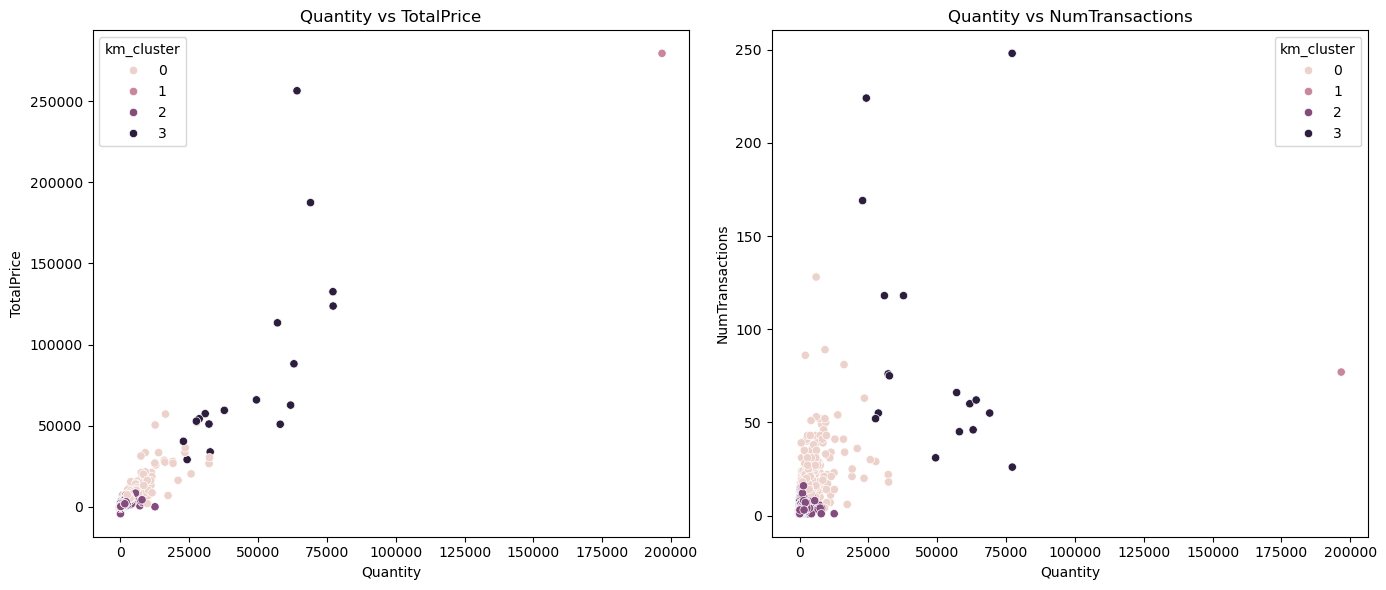

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# First subplot
plt.subplot(1, 2, 1)
sns.scatterplot(x='Quantity', y='TotalPrice', hue='km_cluster', data=customer_df)
plt.title('Quantity vs TotalPrice')

# Second subplot
plt.subplot(1, 2, 2)
sns.scatterplot(x='Quantity', y='NumTransactions', hue='km_cluster', data=customer_df)
plt.title('Quantity vs NumTransactions')

plt.tight_layout()
plt.show()


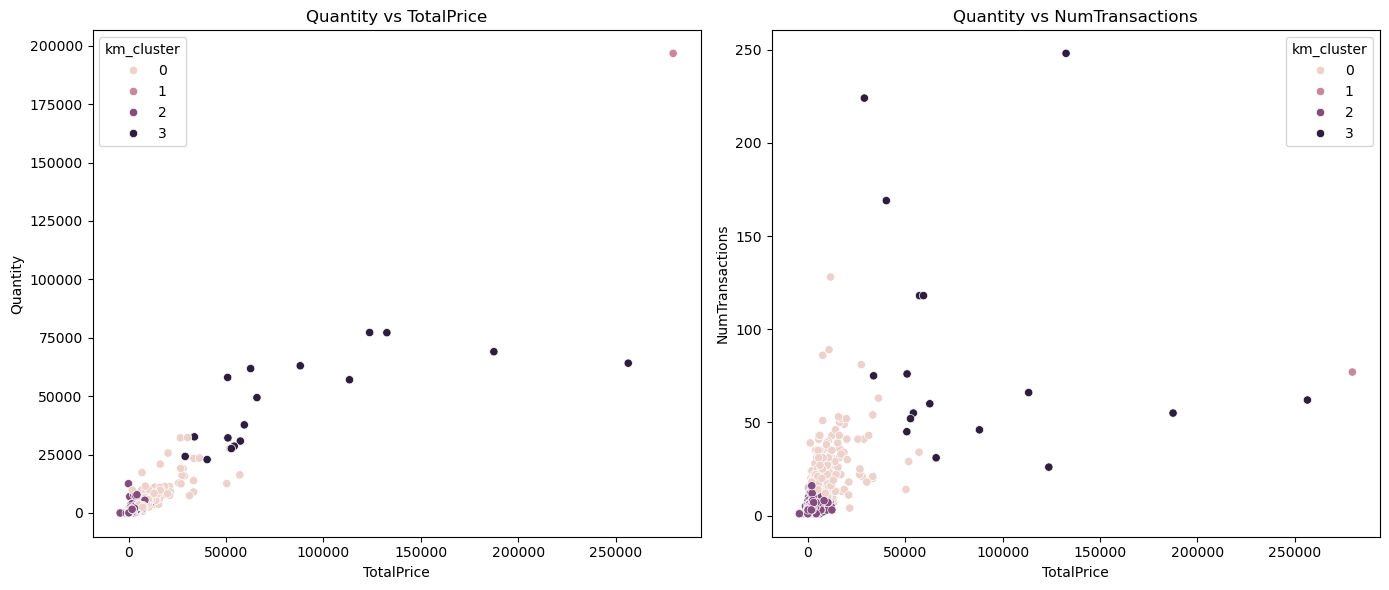

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# First subplot
plt.subplot(1, 2, 1)
sns.scatterplot(x='TotalPrice', y='Quantity', hue='km_cluster', data=customer_df)
plt.title('Quantity vs TotalPrice')

# Second subplot
plt.subplot(1, 2, 2)
sns.scatterplot(x='TotalPrice', y='NumTransactions', hue='km_cluster', data=customer_df)
plt.title('Quantity vs NumTransactions')

plt.tight_layout()
plt.show()

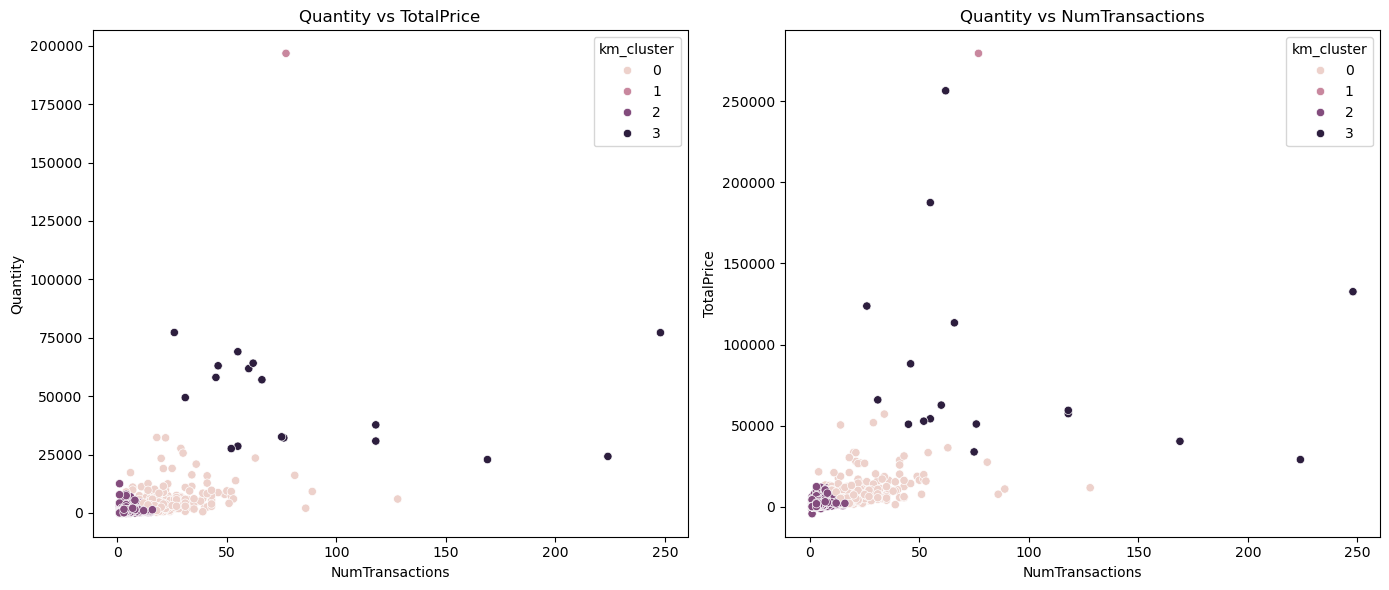

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# First subplot
plt.subplot(1, 2, 1)
sns.scatterplot(x='NumTransactions', y='Quantity', hue='km_cluster', data=customer_df)
plt.title('Quantity vs TotalPrice')

# Second subplot
plt.subplot(1, 2, 2)
sns.scatterplot(x='NumTransactions', y='TotalPrice', hue='km_cluster', data=customer_df)
plt.title('Quantity vs NumTransactions')

plt.tight_layout()
plt.show()

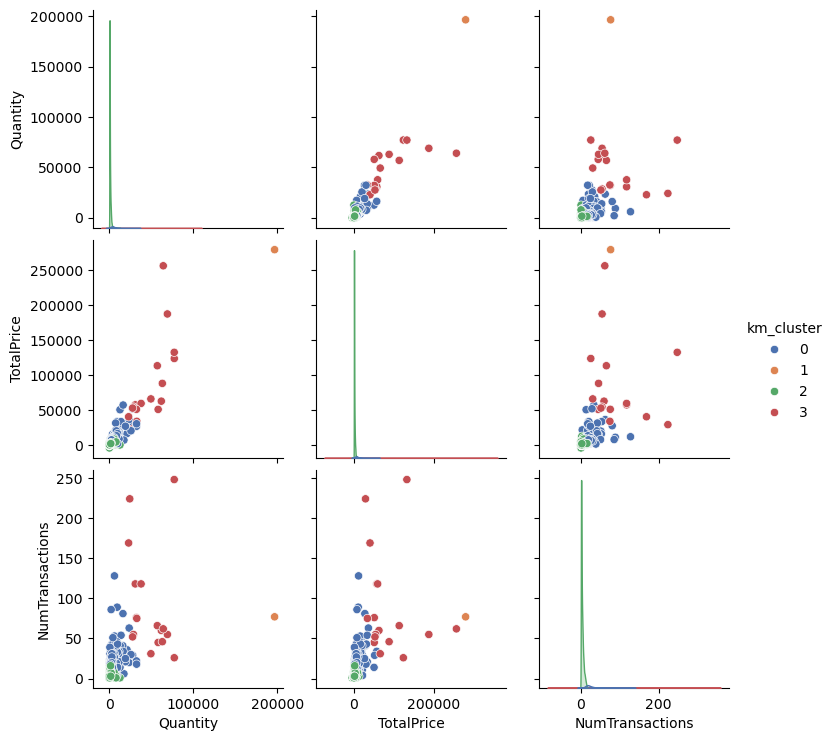

In [27]:
sns.pairplot(customer_df, vars=['Quantity', 'TotalPrice', 'NumTransactions'], hue='km_cluster', palette='deep')
plt.show()

In [28]:
customer_df.groupby('km_cluster')[['Quantity', 'TotalPrice', 'NumTransactions']].mean()

,Quantity,TotalPrice,NumTransactions
km_cluster,,,
0,5196.150735,9032.253051,23.419118
1,196719.000000,279489.020000,77.000000
2,608.404949,1005.554168,3.482852
3,47841.588235,85831.285294,89.764706


### **Cluster 0**
**Quantity:** - 5,196

**TotalPrice:**  - 9,032

**NumTransactions:** - 23

**Interpretation:** Medium Quantity buyers with average spending and a moderate number of transactions.

**Strategy:** These are potential value buyers – consistent customers. Consider offering loyalty programs or cross-selling to increase their basket size.

### **Cluster 1**
**Quantity:**  - 196,719

**TotalPrice:**   - 279,489

**NumTransactions:** -  77

**Interpretation:** Extremely high quantity and total price – these are your bulk buyers or resellers.

**Strategy:** This is your high-value segment. Provide exclusive deals, dedicated support, and maybe B2B pricing or early product access.

### **Cluster 2**
**Quantity:** - 608

**TotalPrice:**   - 1,005

**NumTransactions:** - 3.5

**Interpretation:** Low quantity, low spenders with very few transactions – likely one-time or low-engagement users.

**Strategy:** Consider targeting with promotional offers, or analyze if they are worth retaining based on CLTV.

### **Cluster 3**
**Quantity:**  -  47,841

**TotalPrice:**  -  85,831

**NumTransactions:** -   90

**Interpretation:** High volume and frequent transactions with substantial spending.

**Strategy:** These are your loyal, high-frequency customers. Engage them with premium services, exclusive previews, and VIP loyalty programs.

# **2. Hierarchical Clustering**

- identifying the optimal number of clusters using Dendrogram

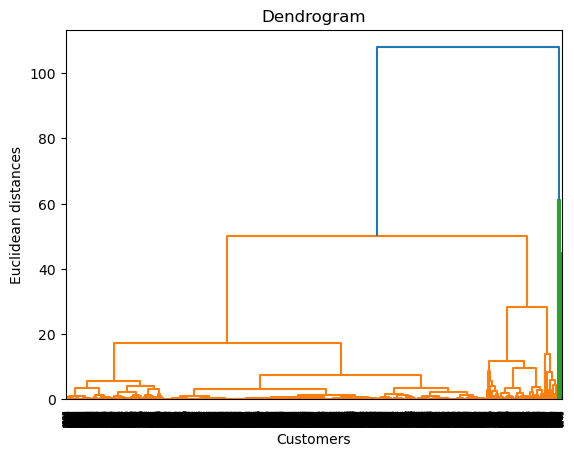

In [31]:
import scipy.cluster.hierarchy as sch

data = sch.linkage(X_scaled, method = 'ward')         # ward means centroid

dendrogram = sch.dendrogram(data)

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

**Hierarchical Clustering Model**

In [33]:
# Step 2: Fit Hierarchical Clustering and predict clusters
# Choose the number of clusters (e.g., 5 based on your K-Means result or dendrogram)

from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')

# Fit and predict cluster labels
h_cluster_labels = hc.fit_predict(X_scaled)

# Step 3: Add cluster labels to the original customer_df
# Convert X_scaled back to a DataFrame if needed, or use customer_df
customer_df['h_cluster'] = h_cluster_labels

# Verify the result
print(customer_df.head())

   CustomerID  Quantity  TotalPrice  NumTransactions  km_cluster  h_cluster
0     12346.0         0        0.00                2           2          3
1     12347.0      2458     4310.00                7           2          1
2     12348.0      2341     1797.24                4           2          3
3     12349.0       631     1757.55                1           2          3
4     12350.0       197      334.40                1           2          3


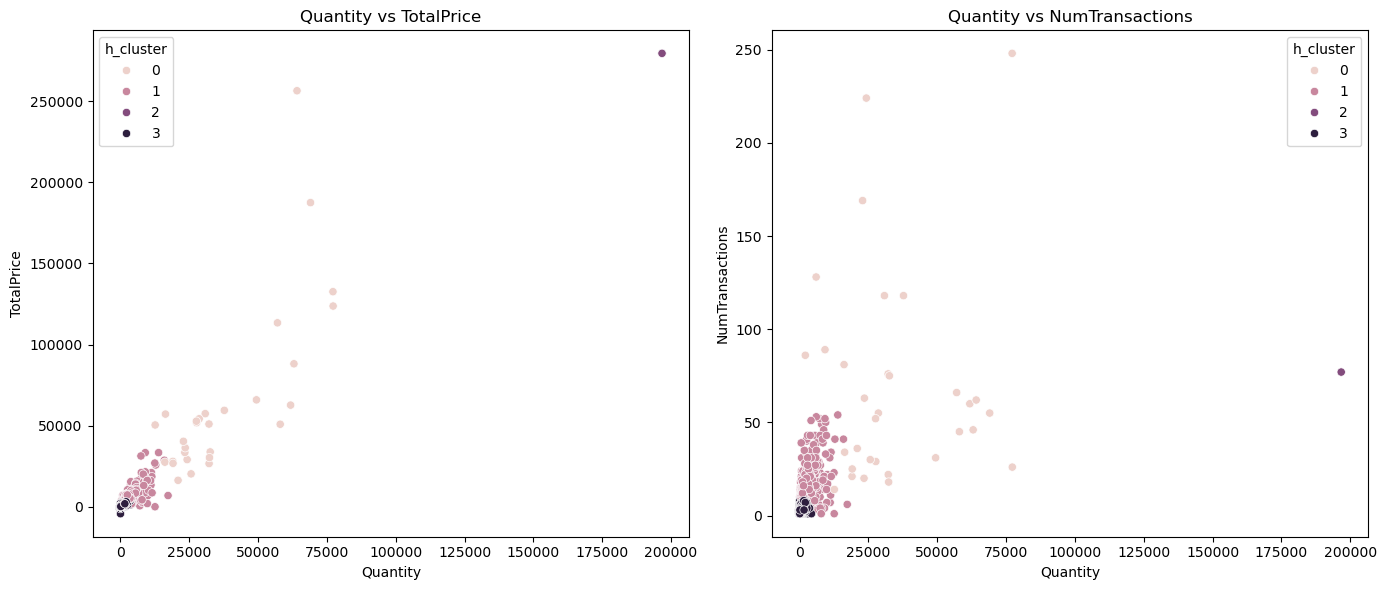

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# First subplot
plt.subplot(1, 2, 1)
sns.scatterplot(x='Quantity', y='TotalPrice', hue='h_cluster', data=customer_df)
plt.title('Quantity vs TotalPrice')

# Second subplot
plt.subplot(1, 2, 2)
sns.scatterplot(x='Quantity', y='NumTransactions', hue='h_cluster', data=customer_df)
plt.title('Quantity vs NumTransactions')

plt.tight_layout()
plt.show()


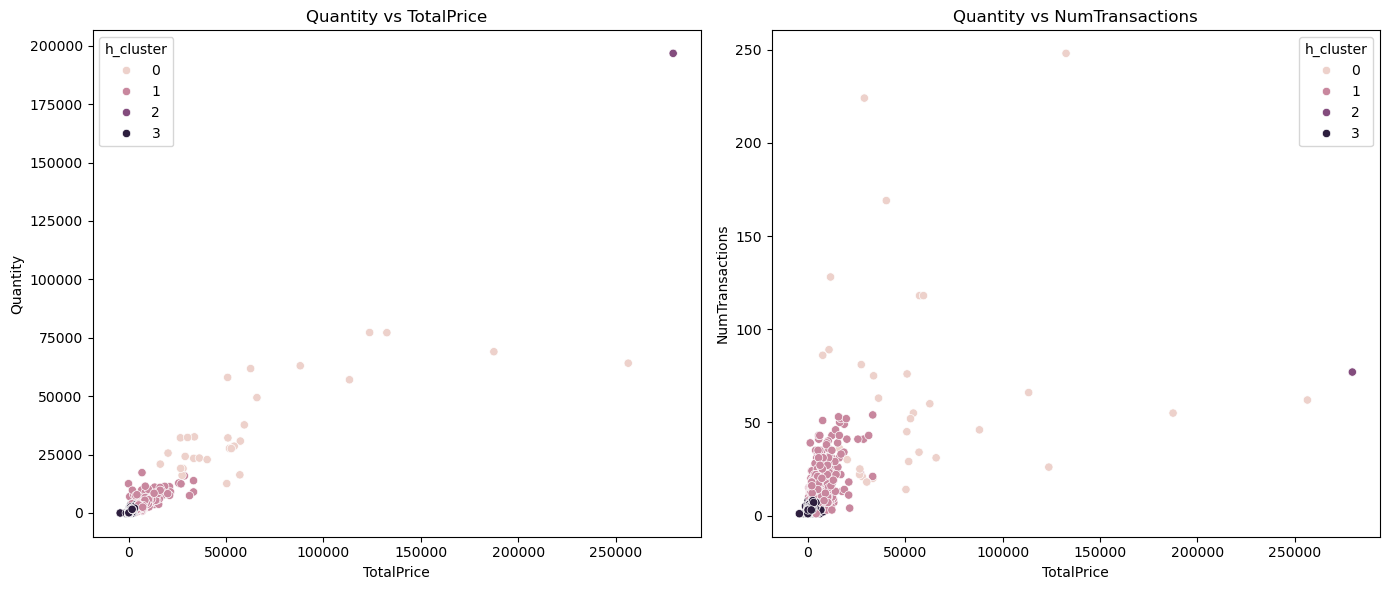

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# First subplot
plt.subplot(1, 2, 1)
sns.scatterplot(x='TotalPrice', y='Quantity', hue='h_cluster', data=customer_df)
plt.title('Quantity vs TotalPrice')

# Second subplot
plt.subplot(1, 2, 2)
sns.scatterplot(x='TotalPrice', y='NumTransactions', hue='h_cluster', data=customer_df)
plt.title('Quantity vs NumTransactions')

plt.tight_layout()
plt.show()

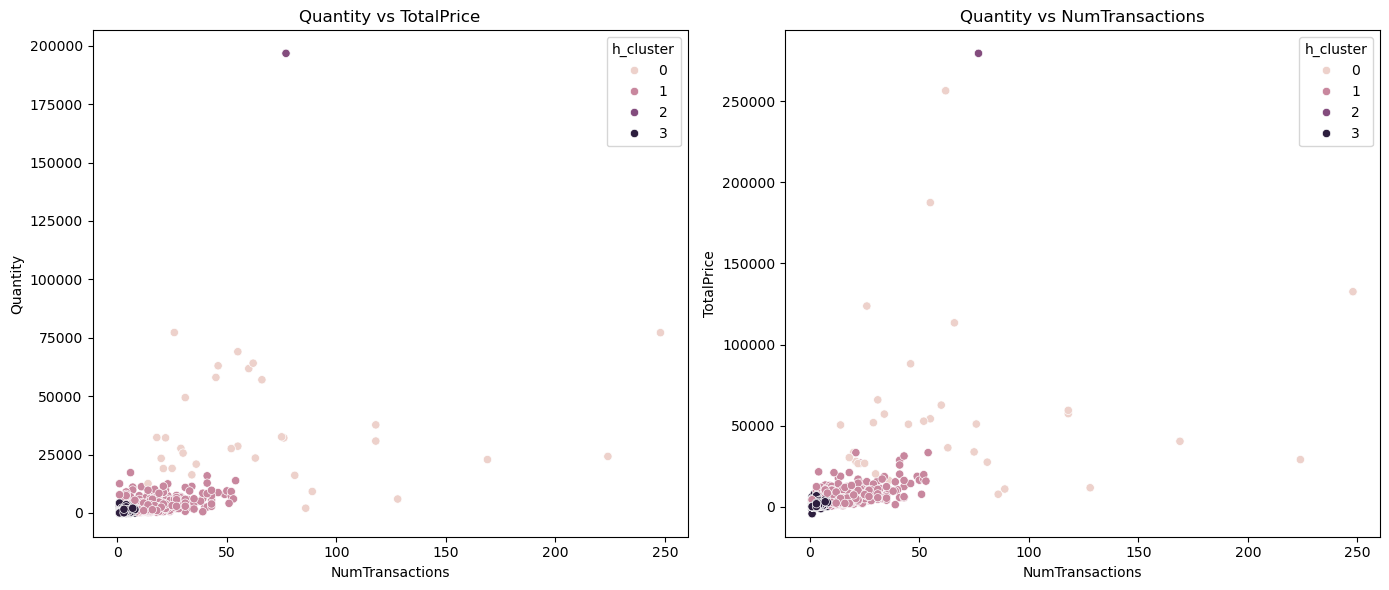

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# First subplot
plt.subplot(1, 2, 1)
sns.scatterplot(x='NumTransactions', y='Quantity', hue="h_cluster", data=customer_df)
plt.title('Quantity vs TotalPrice')

# Second subplot
plt.subplot(1, 2, 2)
sns.scatterplot(x='NumTransactions', y='TotalPrice', hue='h_cluster', data=customer_df)
plt.title('Quantity vs NumTransactions')

plt.tight_layout()
plt.show()

In [37]:
customer_df.groupby('h_cluster')[['Quantity', 'TotalPrice', 'NumTransactions']].mean()

,Quantity,TotalPrice,NumTransactions
h_cluster,,,
0,34353.468750,59199.064688,69.437500
1,2942.019200,5094.082720,15.283200
2,196719.000000,279489.020000,77.000000
3,477.139472,792.246910,2.783791


### **Cluster 0**

**Quantity:**  - 34,353

**TotalPrice:**  - 59,199

**NumTransactions:**  - 69

**Interpretation:** This group represents active and moderately high-spending customers, likely repeat buyers who make consistent purchases.

**Strategy:** Focus on loyalty rewards and personalized offers to retain and upsell.

### **Cluster 1**

**Quantity:**  - 2,942

**TotalPrice:**  - 5,094

**NumTransactions:**  - 15

**Interpretation:** Average buyers who are somewhat engaged but don’t spend significantly.

**Strategy:** Can be nurtured into loyal customers by providing bundled deals or time-sensitive discounts.

### **Cluster 2**

**Quantity:**  - 196,719

**TotalPrice:**  - 279,489

**NumTransactions:**  - 77

**Interpretation:** High-volume and high-value customers, possibly corporate buyers or distributors.

**Strategy:** Strong focus group—send bulk-order deals, priority service, or contract-based pricing.

### **Cluster 3**

**Quantity:**  - 477

**TotalPrice:**  - 792

**NumTransactions:**  - 2.78

**Interpretation:** Infrequent and low-spending customers, possibly new users or window shoppers.

**Strategy:** Use email campaigns, first-time purchase discounts, or exit intent popups to encourage repeat purchases.

# **3. DBSCAN**

In [40]:
from sklearn. cluster import DBSCAN

for r in range(1,11):
    for m in range(3,10):
        dbs = DBSCAN(eps=r, min_samples=m)
        customer_df["db_cluster"] = dbs.fit_predict(X_scaled)

    if customer_df["db_cluster"].nunique() == 4:                # 4 is no of clusters determined from K-Means
        break

print("eps:",r)
print("min:",m)

eps: 10
min: 9


- **For DBSCAN the optimum no of clusters is taken from K-Means**

In [42]:
from sklearn.cluster import DBSCAN

dbs = DBSCAN(eps=10, min_samples=9)

customer_df["db_cluster"] = dbs.fit_predict(X_scaled)

customer_df["db_cluster"].nunique()

2

In [43]:
customer_df

,CustomerID,Quantity,TotalPrice,NumTransactions,km_cluster,h_cluster,db_cluster
0,12346.0,0,0.00,2,2,3,0
1,12347.0,2458,4310.00,7,2,1,0
2,12348.0,2341,1797.24,4,2,3,0
3,12349.0,631,1757.55,1,2,3,0
4,12350.0,197,334.40,1,2,3,0
...,...,...,...,...,...,...,...
4367,18280.0,45,180.60,1,2,3,0
4368,18281.0,54,80.82,1,2,3,0
4369,18282.0,98,176.60,3,2,3,0
4370,18283.0,1397,2094.88,16,2,1,0


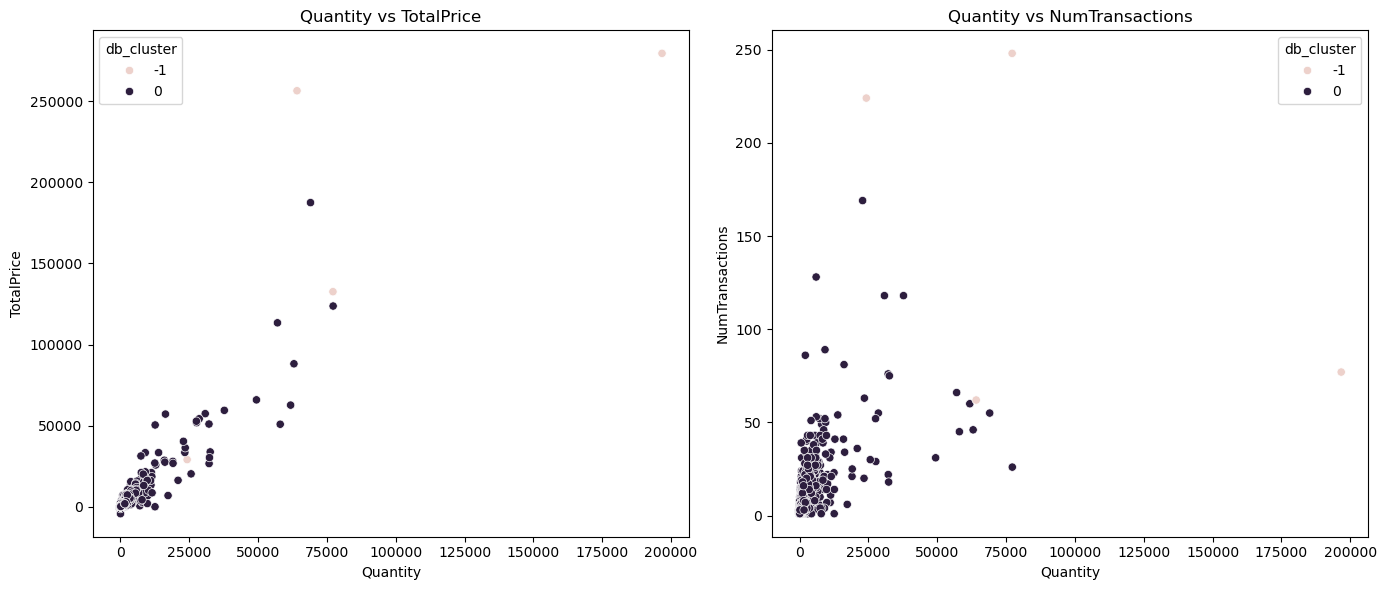

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# First subplot
plt.subplot(1, 2, 1)
sns.scatterplot(x='Quantity', y='TotalPrice', hue='db_cluster', data=customer_df)
plt.title('Quantity vs TotalPrice')

# Second subplot
plt.subplot(1, 2, 2)
sns.scatterplot(x='Quantity', y='NumTransactions', hue='db_cluster', data=customer_df)
plt.title('Quantity vs NumTransactions')

plt.tight_layout()
plt.show()


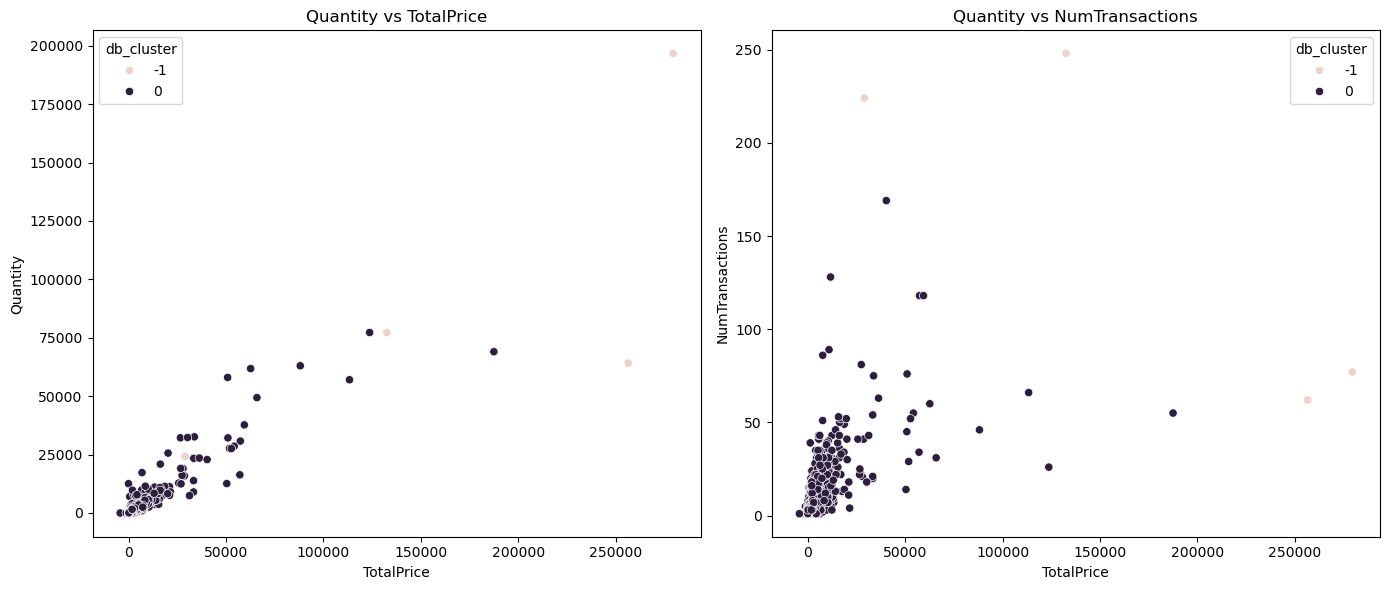

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# First subplot
plt.subplot(1, 2, 1)
sns.scatterplot(x='TotalPrice', y='Quantity', hue='db_cluster', data=customer_df)
plt.title('Quantity vs TotalPrice')

# Second subplot
plt.subplot(1, 2, 2)
sns.scatterplot(x='TotalPrice', y='NumTransactions', hue='db_cluster', data=customer_df)
plt.title('Quantity vs NumTransactions')

plt.tight_layout()
plt.show()

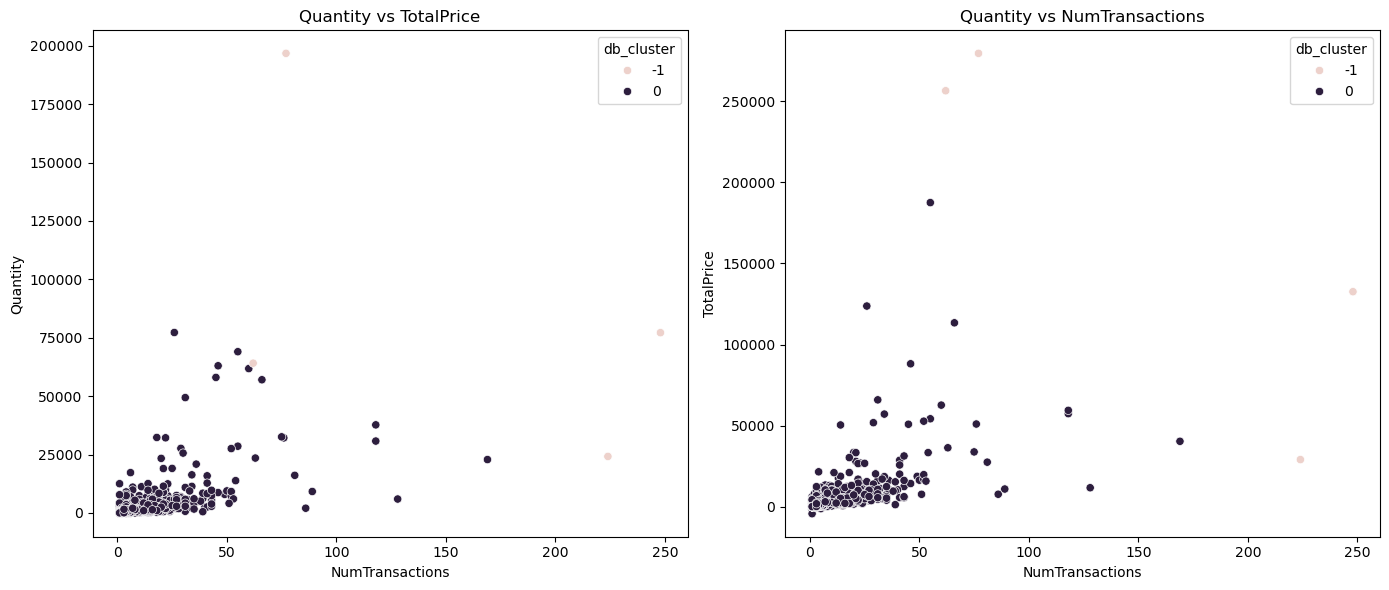

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# First subplot
plt.subplot(1, 2, 1)
sns.scatterplot(x='NumTransactions', y='Quantity', hue="db_cluster", data=customer_df)
plt.title('Quantity vs TotalPrice')

# Second subplot
plt.subplot(1, 2, 2)
sns.scatterplot(x='NumTransactions', y='TotalPrice', hue='db_cluster', data=customer_df)
plt.title('Quantity vs NumTransactions')

plt.tight_layout()
plt.show()

In [47]:
customer_df.groupby('db_cluster')[['Quantity', 'TotalPrice', 'NumTransactions']].mean()

,Quantity,TotalPrice,NumTransactions
db_cluster,,,
-1,90557.750000,174393.057500,152.750000
0,1040.443452,1740.497615,4.940247


### **Cluster -1**
**Quantity:** -90,558

**TotalPrice:** - 174,393

**NumTransactions:** - 153

**Interpretation:** These are likely bulk buyers or frequent high-value customers. DBSCAN assigns -1 to noise points, but here it might represent a core group with dense interactions.

**Strategy:** These are your most engaged and valuable users. Focus on exclusive offers, personalized communication, and business-level incentives.

### **Cluster 0**

**Quantity:** -1,040

**TotalPrice:** - ₹1,740

**NumTransactions:** -5

**Interpretation:** Smaller buyers, possibly one-time or low-frequency shoppers with lower overall value.

**Strategy:**  Try re-engagement via discounts or curated recommendations. This group may also include seasonal shoppers or customers with limited interest.